# unzipping folder of dataset

In [1]:
import zipfile as zf
files = zf.ZipFile("data.zip",'r')
files.extractall('directory to extract')
files.close()

# Importing the Keras libraries and packages

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten 
from keras.layers import Dropout

Using TensorFlow backend.


# Data Loading

In [3]:
Images = []
Labels= []
total_class = 43
cur_directory = os.path.join('c:\\Users\\dell\\Desktop\\tsr\\directory to extract\\Dataset')

# iterating on all the images of the index folder

In [4]:
for index in range(total_class):
  path = os.path.join(cur_directory,'train',str(index))
  images = os.listdir(path)
#iterating on all the images of the index folder
  for img in images:
    try:
      image = Image.open(path + '\\'+ img)
      image = image.resize((64,64))
      image = np.array(image)
      Images.append(image)
      Labels.append(index)
    except:
        print("Error loading image")
Images = np.array(Images)
Labels = np.array(Labels)
print(Images.shape, Labels.shape)

(39269, 64, 64, 3) (39269,)


# splitting data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.2, random_state=42)
print("Shape of x_train: ", x_train.shape, " and y_train:",y_train.shape)
print("Shape of x_test: ", x_test.shape, " and y_test:",y_test.shape)



Shape of x_train:  (31415, 64, 64, 3)  and y_train: (31415,)
Shape of x_test:  (7854, 64, 64, 3)  and y_test: (7854,)


In [6]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# model creation

In [7]:
# Initialising the CNN
model = Sequential()



In [8]:
# Step 1 - Convolution
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))



In [9]:
# Step 2 - Pooling
model.add(MaxPool2D(pool_size=(2, 2)))

In [10]:
# Step 3 - Dropout
model.add(Dropout(rate=0.25))


In [11]:
# Step 1 & 2 with more hidden layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


In [12]:
# Step 4 - Flattening
model.add(Flatten())

In [13]:
# Step 5 - Full connection
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [14]:
# step-6 compiling  the CNN
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

In [15]:
epochs = 10
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs,validation_data=(x_test, y_test))
model.save('traffic_recognition.h5')

Train on 31415 samples, validate on 7854 samples
Epoch 1/10
31415/31415 [==============================] - 1169s 37ms/step - loss: 1.7943 - accuracy: 0.5653 - val_loss: 0.2430 - val_accuracy: 0.9486
Epoch 2/10
31415/31415 [==============================] - 1225s 39ms/step - loss: 0.4718 - accuracy: 0.8639 - val_loss: 0.1322 - val_accuracy: 0.9663
Epoch 3/10
31415/31415 [==============================] - 1112s 35ms/step - loss: 0.3040 - accuracy: 0.9104 - val_loss: 0.0777 - val_accuracy: 0.9796
Epoch 4/10
31415/31415 [==============================] - 1042s 33ms/step - loss: 0.2423 - accuracy: 0.9282 - val_loss: 0.0718 - val_accuracy: 0.9850
Epoch 5/10
31415/31415 [==============================] - 846s 27ms/step - loss: 0.2004 - accuracy: 0.9422 - val_loss: 0.0542 - val_accuracy: 0.9864
Epoch 6/10
31415/31415 [==============================] - 836s 27ms/step - loss: 0.1630 - accuracy: 0.9532 - val_loss: 0.0561 - val_accuracy: 0.9845
Epoch 7/10
31415/31415 [=============================

# Training Result Visualization

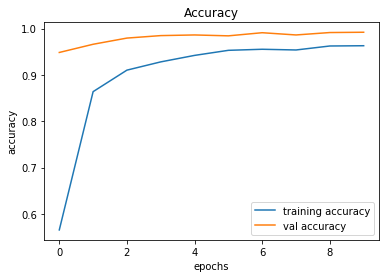

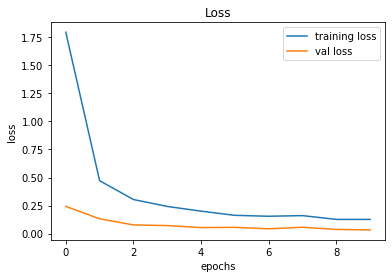

In [16]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Testing the model

In [17]:
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv(cur_directory+'\\' +'Test.csv')
labels = y_test["ClassId"].values
img_paths = y_test["Path"].values
test_data=[]
for path in img_paths:
  image = Image.open(cur_directory + '\\' + path)
  image = image.resize((64,64))
  test_data.append(np.array(image))
test_data = np.array(test_data)
pred = model.predict_classes(test_data)


# Accuracy with the test data

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, pred)

0.9665083135391924

# load the trained model to classify sign

In [19]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model
model = load_model('traffic_recognition.h5')

# dictionary to label all traffic signs class

In [20]:
classes = { 1:'Speed limit (20km/h)',
    2:'Speed limit (30km/h)',
    3:'Speed limit (50km/h)',
    4:'Speed limit (60km/h)',
    5:'Speed limit (70km/h)',
    6:'Speed limit (80km/h)',
    7:'End of speed limit (80km/h)',
    8:'Speed limit (100km/h)',
    9:'Speed limit (120km/h)',
    10:'No passing',
    11:'No passing veh over 3.5 tons',
    12:'Right-of-way at intersection',
    13:'Priority road',
    14:'Yield',
    15:'Stop',
    16:'No vehicles',
    17:'Veh > 3.5 tons prohibited',
    18:'No entry',
    19:'General caution',
    20:'Dangerous curve left',
    21:'Dangerous curve right',
    22:'Double curve',
    23:'Bumpy road',
    24:'Slippery road',
    25:'Road narrows on the right',
    26:'Road work',
    27:'Traffic signals',
    28:'Pedestrians',
    29:'Children crossing',
    30:'Bicycles crossing',
    31:'Beware of ice/snow',
    32:'Wild animals crossing',
    33:'End speed + passing limits',
    34:'Turn right ahead',
    35:'Turn left ahead',
    36:'Ahead only',
    37:'Go straight or right',
    38:'Go straight or left',
    39:'Keep right',
    40:'Keep left',
    41:'Roundabout mandatory',
    42:'End of no passing',
    43:'End no passing veh > 3.5 tons'}

In [21]:
from matplotlib import image
from matplotlib import pyplot

def classify(file_path):
  image = Image.open(file_path)
  image = image.resize((64,64))
  pyplot.imshow(image)
  pyplot.show()
  #image.show()
  image = numpy.expand_dims(image, axis=0)
  image = numpy.array(image)
  pred = model.predict_classes([image])[0]
  sign = classes[pred+1]
  print('Prediction:' + sign)
  result.configure(text=sign)

In [22]:
def show_classify_btn(file_path):
  classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  classify_b.configure(bg='#364156', fg='white',font=('arial',10,'bold'))
  classify_b.place(relx=0.79,rely=0.46)

In [23]:
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        result.configure(text='')
        show_classify_btn(file_path)
    except:
        pass

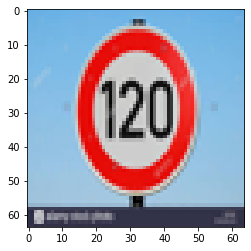

Prediction:Speed limit (120km/h)


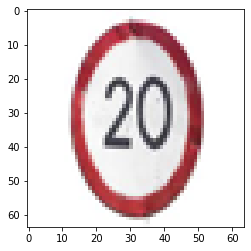

Prediction:Speed limit (20km/h)


In [30]:
if __name__=="__main__":
  #initialise GUI
  top=tk.Tk()
  top.geometry('800x800')
  top.title('Traffic sign recognition')
  top.configure(bg='LightCyan2')
  heading = Label(top, text="Traffic sign recognition",pady=20, font=('arial',40,'bold'))
  heading.configure(background='LightCyan2',fg='black')
  heading.pack()
  result=Label(top, font=('arial',15,'bold'))
  result.configure(fg='#011638',bg='LightCyan2')
  sign_image = Label(top)
  upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
  upload.configure(background='#364156', fg='white',font=('arial',10,'bold'))
  upload.pack(side=BOTTOM,pady=50)
  sign_image.pack(side=BOTTOM,expand=True)
  result.pack(side=BOTTOM,expand=True)
  top.mainloop()
